# Linear Regression Model for predicting property prices in Greater Toronto Area (GTA).

Load required packages.

In [1]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Start the clock for estimating the code execution time.



In [2]:
t0 = time.time()

# Load the dataset.

In [3]:
path = os.getcwd() +"/clean_combined_toronto_property_data.xlsx"
data = pd.read_excel(path)
print(data.shape)
data.head()

(7324, 6)


,price,region,address,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON","2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,"Ajax, ON","717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,"Ajax, ON","52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,"Ajax, ON","249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,"Ajax, ON","18 MONK CRES, Ajax, Ontario",3,3,0.899999


# Data Cleaning.

Drop the **address** column.

Keep only property listings with at least 1 and at most 4 bedrooms. 

Keep only property listings with at least 1 and at most 4 bathrooms. 

Keep only property listings with price of at least 0.5 million dollars and at most 3 million dollars. 

Also, remove ", ON" from each region name in the region column of dataset.

In [4]:
data.drop(columns= ["address"], inplace= True)
data["region"] = data["region"].str.replace(",", "")
data["region"] = data["region"].str.replace("\sON", "")
data = data[(data.bedrooms >= 1) & (data.bedrooms <= 4)]
data = data[(data.bathrooms >= 1) & (data.bathrooms <= 4)]
data = data[(data.pricem >= 0.5) & (data.pricem <= 3)]
data = data.reset_index().drop(columns= ["index"])
print(data.shape)
data

(5997, 5)


/var/folders/q9/k5pzlrtn1c92hpddrxp2mjsr0000gn/T/ipykernel_58474/1896302143.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["region"] = data["region"].str.replace("\sON", "")


,price,region,bedrooms,bathrooms,pricem
0,799000,Ajax,3,3,0.799000
1,989000,Ajax,2,1,0.989000
2,999900,Ajax,3,4,0.999900
3,799900,Ajax,3,3,0.799900
4,899999,Ajax,3,3,0.899999
...,...,...,...,...,...
5992,1588880,Scarborough Toronto,2,2,1.588880
5993,505000,Scarborough Toronto,1,1,0.505000
5994,752880,Scarborough Toronto,2,2,0.752880
5995,1150000,Scarborough Toronto,3,3,1.150000


In [5]:
data.describe()

,price,bedrooms,bathrooms,pricem
count,5.997000e+03,5997.000000,5997.000000,5997.000000
mean,1.145575e+06,2.882441,2.699016,1.145575
std,4.778242e+05,0.877230,0.973269,0.477824
min,5.000000e+05,1.000000,1.000000,0.500000
25%,7.990000e+05,2.000000,2.000000,0.799000
50%,9.999000e+05,3.000000,3.000000,0.999900
75%,1.399000e+06,3.000000,4.000000,1.399000
max,3.000000e+06,4.000000,4.000000,3.000000


Check missing values.

In [6]:
data.isna().sum()

price        0
region       0
bedrooms     0
bathrooms    0
pricem       0
dtype: int64

Check the spread of propery prices using boxplot.

Text(0.5, 0, 'Price in Million Dollars')

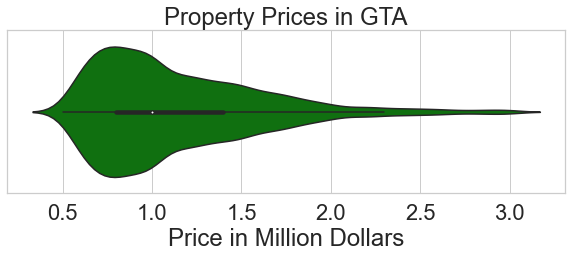

In [7]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
plt.figure(figsize= (10,3))
sns.violinplot(x = data.pricem,  color = 'green')
plt.title("Property Prices in GTA")
plt.xlabel("Price in Million Dollars")

In [8]:
data_corr = data.drop(columns= ["price"])
data_corr

,region,bedrooms,bathrooms,pricem
0,Ajax,3,3,0.799000
1,Ajax,2,1,0.989000
2,Ajax,3,4,0.999900
3,Ajax,3,3,0.799900
4,Ajax,3,3,0.899999
...,...,...,...,...
5992,Scarborough Toronto,2,2,1.588880
5993,Scarborough Toronto,1,1,0.505000
5994,Scarborough Toronto,2,2,0.752880
5995,Scarborough Toronto,3,3,1.150000


Label each region with a distinct digit, the process known as label encoding.

This helps finding the correlation of the column **region** with other features.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
region_code = le.fit_transform(data.region)
data_corr["region_code"] = region_code
print(data_corr.shape)
data_corr

(5997, 5)


,region,bedrooms,bathrooms,pricem,region_code
0,Ajax,3,3,0.799000,0
1,Ajax,2,1,0.989000,0
2,Ajax,3,4,0.999900,0
3,Ajax,3,3,0.799900,0
4,Ajax,3,3,0.899999,0
...,...,...,...,...,...
5992,Scarborough Toronto,2,2,1.588880,25
5993,Scarborough Toronto,1,1,0.505000,25
5994,Scarborough Toronto,2,2,0.752880,25
5995,Scarborough Toronto,3,3,1.150000,25


Drop **region** column.

In [10]:
data_corr.drop(columns= ["region"], inplace= True)
data_corr

,bedrooms,bathrooms,pricem,region_code
0,3,3,0.799000,0
1,2,1,0.989000,0
2,3,4,0.999900,0
3,3,3,0.799900,0
4,3,3,0.899999,0
...,...,...,...,...
5992,2,2,1.588880,25
5993,1,1,0.505000,25
5994,2,2,0.752880,25
5995,3,3,1.150000,25


Check correlation between different features.

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'bedrooms'),
  Text(1.5, 0, 'bathrooms'),
  Text(2.5, 0, 'pricem'),
  Text(3.5, 0, 'region_code')])

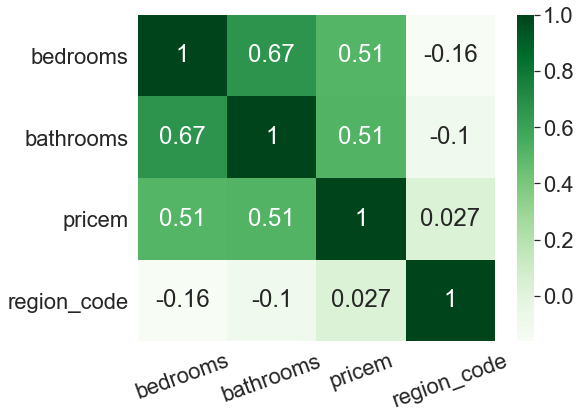

In [11]:
corr_matrix = data_corr.corr()
sns.set(font_scale=2)
plt.figure(figsize = (8,6))
sns.heatmap(data = corr_matrix, color = 'green', annot = True, cmap= "Greens")
plt.xticks(rotation = 20)

We will use the three features, namely **bedrooms**, **bathrooms** and **region** for the linear regression analysis.

# Data pre-processing.

Output variable.

In [12]:
Y = data['pricem']
print(len(Y))
Y

5997


0       0.799000
1       0.989000
2       0.999900
3       0.799900
4       0.899999
          ...   
5992    1.588880
5993    0.505000
5994    0.752880
5995    1.150000
5996    0.550000
Name: pricem, Length: 5997, dtype: float64

Get dummy variables for the **region** column.

In [13]:
X = pd.get_dummies(data.drop(columns= ["pricem", 'price']), prefix= 'region')
print(X.shape)
X

(5997, 33)


,bedrooms,bathrooms,region_Ajax,region_Aurora,region_Brampton,region_Brantford,region_Brock,region_Burlington,region_Caledon,region_Cambridge,...,region_Old Toronto Toronto,region_Oshawa,region_Pickering,region_Richmond Hill,region_Scarborough Toronto,region_Scugog,region_Uxbridge,region_Vaughan,region_Whitby,region_Whitchurch-Stouffville
0,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5993,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5994,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5995,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Splitting the data into training and testing sets


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4197, 33)
(1800, 33)
(4197,)
(1800,)


# Linear regression Model Development.

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

Model evaluation.

In [16]:
from sklearn.metrics import mean_absolute_error

# model evaluation for training set
y_train_predict = lm.predict(X_train)
mae = mean_absolute_error(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('mean_absolute_error is ' + str(mae))
print("\n")

# model evaluation for testing set
y_test_predict = lm.predict(X_test)
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('mean_absolute_error is ' + str(mae))

The model performance for training set
--------------------------------------
mean_absolute_error is 0.24017580369814004


The model performance for testing set
--------------------------------------
mean_absolute_error is 0.24364823203450525


Below we take a quick look at some of the predictions made my the model.

In [17]:
model_check_quick = pd.concat([
    X_test[["bedrooms", "bathrooms"]], pd.DataFrame({"real price ($M)" : Y_test, 'predicted price ($M)' : y_test_predict})
], axis = 1)
model_check_quick["abs_difference ($M)"] = abs(model_check_quick["real price ($M)"] - model_check_quick["predicted price ($M)"])
model_check_quick.head(30)

,bedrooms,bathrooms,real price ($M),predicted price ($M),abs_difference ($M)
79,3,3,0.999000,1.016266,0.017266
5517,3,3,0.749900,0.914703,0.164803
4667,4,4,1.999999,1.358643,0.641356
4932,2,3,0.799900,0.812195,0.012295
4750,1,1,0.649999,0.330170,0.319829
3505,2,2,0.885000,1.112396,0.227396
3448,4,4,1.399000,1.798065,0.399065
2146,3,1,1.690000,0.925842,0.764158
2940,1,1,0.599000,0.627777,0.028777
2577,3,2,1.199000,1.065033,0.133967


In [18]:
print('The execution of entire code in the notebook (excluding time to load the packages) took', time.time()-t0, 'seconds.')

The execution of entire code in the notebook (excluding time to load the packages) took 1.5528769493103027 seconds.


Author:

Mangaljit Singh